This notebook if demonstation for challenge Vietnamese NLP Dataset for Continual Learning. In the past, underthesea team is only focused on tuning model. In this project, we create a simple challenge for ourselves to build a continuous learning NLP system.

## The August 2021 Challenges Vietnamese NLP Dataset for Continual Learning

The August 2021 Challenges are [part-of-speech tagging](https://en.wikipedia.org/wiki/Part-of-speech_tagging) and [dependency parsing](https://universaldependencies.org/).

### Create environment

In [1]:
%load_ext autoreload
%autoreload 2

# add project folder
import os
from os.path import dirname, join
PROJECT_FOLDER = dirname(dirname(os.getcwd()))
os.sys.path.append(PROJECT_FOLDER)

# add dependencies
from underthesea.utils.col_analyzer import UDAnalyzer, computeIDF
from underthesea.utils.col_script import UDDataset
from IPython.display import display, display_png
from wordcloud import WordCloud
from PIL import Image
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# init folder
DATASETS_FOLDER = join(PROJECT_FOLDER, "datasets")
COL_FOLDER = join(DATASETS_FOLDER, "UD_Vietnamese-COL")
raw_file = join(COL_FOLDER, "corpus", "raw", "202108.txt")

Load dictionary with 31327 words.


### Datasets

In [2]:
%%capture
raw_file = join(COL_FOLDER, "corpus", "raw", "202108.txt")
generated_dataset = UDDataset.load_from_raw_file(raw_file)

ud_file = join(COL_FOLDER, "corpus", "ud", "202108.txt")
ud_dataset = UDDataset.load(ud_file)

generated_dataset.merge(ud_dataset)
dataset = generated_dataset

dataset.write(ud_file)

In [3]:
analyzer = UDAnalyzer()

In [4]:
analyzer.analyze_dataset_len(dataset)
words_pos = analyzer.analyze_words_pos(dataset)
punctuations = set(words_pos[words_pos['pos'] == 'CH']['word'])

Number of sentences 795


In [5]:
sent_ids = analyzer.analyze_sent_ids(dataset)

In [6]:
doc_sents = analyzer.analyze_doc_sent_freq(dataset)

Number of doc URLs 72


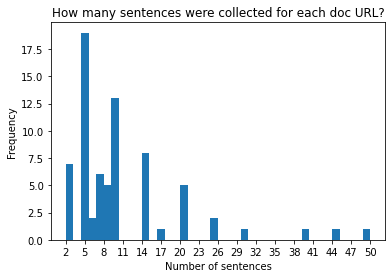

In [7]:
x = [item[1] for item in doc_sents]
plt.hist(x, bins=40)
plt.xticks(np.arange(min(x), max(x)+1, 3))
plt.title("How many sentences were collected for each doc URL?")
plt.xlabel("Number of sentences")
plt.ylabel("Frequency")
plt.show()

#### Stopwords using IDF

In [8]:
doc_word_freqs = analyzer.get_doc_word_freq(dataset).values()
idfs = computeIDF(doc_word_freqs)
print("Words with lowest IDFs are candidates for Stopwords!")
stopwords = {k: v for k, v in sorted(dict(idfs).items(), key=lambda x: x[1])[:40]}
stopwords

Words with lowest IDFs are candidates for Stopwords!


{',': 0.0,
 '.': 0.0,
 'và': 0.07918124604762482,
 'của': 0.10914446942506809,
 'là': 0.12493873660829992,
 'được': 0.12493873660829992,
 'cho': 0.12493873660829992,
 'trong': 0.1330566268304794,
 'với': 0.1413291527964693,
 'các': 0.1413291527964693,
 'người': 0.1671364164027548,
 'đã': 0.1671364164027548,
 'có': 0.185234638495551,
 'từ': 0.1945746647496944,
 'này': 0.21387981994508107,
 'để': 0.21387981994508107,
 'theo': 0.22386404085168193,
 'không': 0.23408320603336794,
 'nhiều': 0.24454863971153296,
 'đến': 0.24454863971153296,
 'một': 0.25527250510330607,
 'cũng': 0.25527250510330607,
 'ở': 0.26626788940476925,
 'vào': 0.2891307723642735,
 'đó': 0.3010299956639812,
 'những': 0.3010299956639812,
 'khi': 0.3010299956639812,
 '(': 0.3010299956639812,
 ')': 0.3010299956639812,
 'việc': 0.3132644520809928,
 'về': 0.3258535793890133,
 'tại': 0.33881855655338095,
 'phải': 0.3521825181113625,
 'ngày': 0.3521825181113625,
 'sẽ': 0.3659708025969958,
 'trên': 0.3659708025969958,
 'năm': 0.

In [9]:
sorted(stopwords.keys())

['(',
 ')',
 ',',
 '.',
 'biết',
 'cho',
 'các',
 'có',
 'cũng',
 'cả',
 'của',
 'khi',
 'không',
 'là',
 'một',
 'ngày',
 'người',
 'nhiều',
 'những',
 'này',
 'năm',
 'phải',
 'sau',
 'sẽ',
 'theo',
 'trong',
 'trên',
 'tại',
 'từ',
 'việc',
 'và',
 'vào',
 'về',
 'với',
 'đã',
 'đó',
 'được',
 'đến',
 'để',
 'ở']

### Actionable Insights

We want to explore:

* What is word frequencies?
* What is word frequencies today?
* How many words in this corpus?
* What are out of vocabulary words?

#### What are words

In [10]:
counter = analyzer.analyze_words(dataset)

Most common words
[(',', 1230), ('.', 769), ('và', 258), ('của', 230), ('các', 210), ('trong', 186), ('cho', 180), ('người', 178), ('được', 167), ('với', 155), ('không', 152), ('là', 148), ('có', 148), ('đã', 143), ('để', 136), ('đến', 130), ('những', 108), ('một', 104), ('ngày', 102), ('này', 96), ('từ', 96), ('(', 95), (')', 95), ('"', 91), ('nhiều', 89), ('khi', 89), ('ở', 86), ('theo', 78), ('về', 76), ('vào', 75), ('cũng', 74), ('trên', 68), ('anh', 67), ('phải', 66), ('tại', 66), ('bị', 66), ('việc', 64), ('2', 62), ('đó', 62), ('sẽ', 62), ('việt nam', 59), ('năm', 58), ('covid-19', 56), ('sau', 56), ('như', 54), ('ông', 54), ('lại', 54), ('số', 52), ('ra', 52), ('đang', 51)]
Corpus words:  3346
OOV words
Short OOV words
['!', '"', '%', "'", '(', ')', '+', ',', '-', '.', '. thắng', '. đoạn', '...', '/', '0', '1', '1,2', '1,5', '1-2', '1.178', '1.209.400', '1.286', '1.562.669', '1.677', '1.700', '1.750', '1.995', '1/9', '10', '10-12', '10.639', '10.654', '10/7', '10/8', '100', '10

#### Remove some (potential) stopwords to get clearer Wordcloud

In [11]:
wordlist = [word for word in counter]
for word in wordlist:
    if word in stopwords or word in punctuations:
        del counter[word]

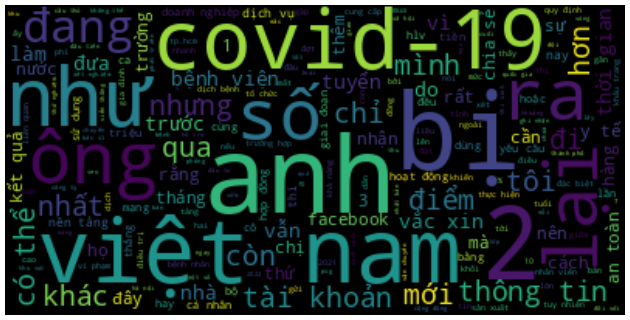

In [12]:
w1 = WordCloud().generate_from_frequencies(counter)
plt.figure(figsize=(16, 12), dpi=50)
plt.imshow(w1, interpolation="bilinear")
plt.axis("off")
plt.show()

Beautiful word cloud for most frequencies words in this corpus.

#### What are today words?

In [13]:
counter = analyzer.analyze_today_words(dataset)

Most common words
[(',', 392), ('.', 200), ('và', 69), ('trong', 54), ('cho', 52), ('(', 46), (')', 46), ('được', 45), ('của', 43), ('đã', 43), ('người', 43), ('có', 38), ('các', 37), ('covid-19', 36), ('vắc xin', 35), ('với', 33), ('ngày', 33), ('để', 29), ('không', 29), ('"', 28), ('tại', 27), ('là', 27), ('bị', 25), ('việc', 25), ('đến', 24), ('một', 22), ('nhiều', 22), ('2', 21), ('này', 21), ('sẽ', 21), ('về', 21), ('ở', 21), ('ca', 21), ('biết', 20), ('y tế', 20), ('bệnh viện', 19), ('anh', 18), ('việt nam', 18), ('giai đoạn', 18), ('trên', 17), ('tiền', 17), ('theo', 17), ('từ', 16), ('điều trị', 16), ('triệu', 15), ('cũng', 15), ('hàng', 15), ('khi', 15), ('liều', 15), ('tháng', 14)]
Corpus words:  1334
OOV words
Short OOV words
['"', '%', '(', ')', ',', '-', '.', '. đoạn', '...', '/', '0', '1', '1,2', '1.209.400', '1.286', '1.562.669', '1.995', '10', '10-12', '10.639', '10.654', '102', '11', '117', '12', '12/8', '120.059', '134', '14', '14,3', '14.359.868', '15', '15.602', '15

#### Remove some (potential) stopwords to get clearer Wordcloud

In [14]:
wordlist = [word for word in counter]
for word in wordlist:
    if word in stopwords or word in punctuations:
        del counter[word]

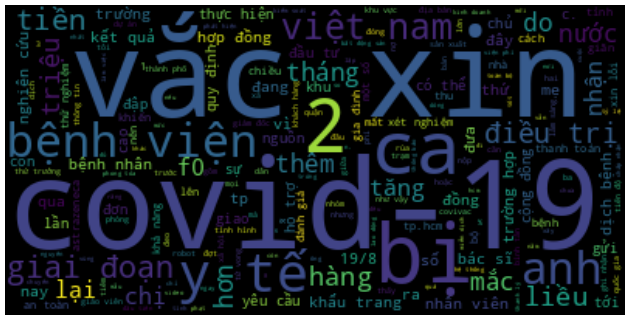

In [15]:
w1 = WordCloud().generate_from_frequencies(counter)
plt.figure(figsize=(16, 12), dpi=50)
plt.imshow(w1, interpolation="bilinear")
plt.axis("off")
plt.show()

## How to Contribute?

It's great that you find this project interesting. Even the smallest contribute is appreciated. Welcome to this exciting journey with us.

### You can contribute in so many ways!

* [Create more usefull open datasets](https://github.com/undertheseanlp/underthesea/tree/master/datasets/UD_Vietnamese-COL)
* [Create more actionable insights](https://github.com/undertheseanlp/underthesea/tree/master/datasets/UD_Vietnamese-COL)